In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
plt.rcParams.update({'font.size': 14})
import matplotlib.gridspec as gridspec
import datetime
%config InlineBackend.figure_format = 'retina'
from datetime import datetime, date
import os

In [2]:
# import regression parameters
regression_params = pd.read_csv('../Data/regression_temperature_performance.csv')
for param in ['summer_params','winter_params','spring_params','fall_params']:
    regression_params[param] = [p[1:-1].split() for p in regression_params[param].values]
    regression_params[param] = [[float(p[i]) for i in range(len(p))] for 
                                    p in regression_params[param].values]
regression_params['sitenum'] = ['0'*(8-len(str(s)))+str(s) for s in regression_params.sitenum.values]

# import temperature data
gridmet_tmin = pd.read_csv('../Data/gridmet_tempsites/gridmet_Tmin_C_15yr_temp_gages.csv')
gridmet_tmin['date'] = pd.to_datetime(gridmet_tmin['date'])
gridmet_tmin = gridmet_tmin.set_index('date')

gridmet_tmax = pd.read_csv('../Data/gridmet_tempsites/gridmet_Tmax_C_15yr_temp_gages.csv')
gridmet_tmax['date'] = pd.to_datetime(gridmet_tmax['date'])
gridmet_tmax = gridmet_tmax.set_index('date')
gridmet_tmin['DOY'] = [date(gridmet_tmin.index.year.values[i], 
                            gridmet_tmin.index.month.values[i], 
                            gridmet_tmin.index.day.values[i]).timetuple().tm_yday
                      for i in range(len(gridmet_tmin))]
gridmet_tmax['DOY'] = gridmet_tmin['DOY']

In [3]:
def streamT(X, a, b, c):
    airT, Q = X
    return a*airT + b*Q + c

In [7]:
num_iterations = 100
num_years = 50
winter_days = [1,92]
spring_days = [92,183]
summer_days = [183,275]
fall_days = [275,366]

dirLoc = '/Volumes/Seagate One Touch HDD Media/'
sourceDir = 'ApplyDepletion_SyntheticHydrographs/'
saveDir = 'ApplyTempModel_SyntheticHydrographs/'

# files = os.listdir(dirLoc+sourceDir)
# # files = fileError

# # fileError = []
# missingSite = []

# for i in range(len(files)):
#     f = files[i]
# #     try:
#     print(i, 'of', len(files),', file:',f)
#     flist = f.split('_')
#     site = (flist[-1])[:-4]
#     qdata = pd.read_csv(dirLoc+sourceDir+f)
#     qdata = qdata.set_index('Day')
#     siteparam = regression_params[regression_params.sitenum.astype('str')==site]
    
#     if len(siteparam)==0:
#         if site not in missingSite:
#             missingSite.append(site)
#         continue

#     keys = ['DOY','airT','T_C']
#     keys1 = ['T_C_dplt'+str(i) for i in range(1,num_iterations+1)]
#     keys = keys+keys1

#     tdata = {key:[] for key in keys}
#     tdata['DOY'] = qdata.DOY.values

#     # get median air temperature
#     site_tmin = gridmet_tmin[[site,'DOY']].groupby('DOY').median()
#     site_tmax = gridmet_tmax[[site,'DOY']].groupby('DOY').median()
#     site_tair = ((site_tmin+site_tmax)/2)
#     tdata['airT'] = (list(site_tair.values.flatten()))*num_years

#     # formula for temperature model requires streamflow in CFS
#     qdata_cfs = qdata
#     for col in qdata_cfs.columns:
#         if col != 'DOY':
#             qdata_cfs[col] = qdata_cfs[col]*100**3/2.54**3/12**3

#     # apply formula for temperature model to each streamflow timeseries
#     for col in qdata_cfs.columns.values:
#         if col !='DOY':
#             meanQ = siteparam.meanQ.values[0]
#             param = siteparam.winter_params.values[0]
#             tseries = np.where((qdata.DOY>=winter_days[0]) & (qdata.DOY<winter_days[1]),
#                                [streamT((tdata['airT'][i],qdata[col].values[i]),*param)
#                                for i in range(len(qdata))],
#                                np.nan)
#             param = siteparam.spring_params.values[0]
#             tseries = np.where((qdata.DOY>=spring_days[0]) & (qdata.DOY<spring_days[1]),
#                                [streamT((tdata['airT'][i],qdata[col].values[i]),*param)
#                                for i in range(len(qdata))],
#                                tseries)
#             param = siteparam.summer_params.values[0]
#             tseries = np.where((qdata.DOY>=summer_days[0]) & (qdata.DOY<summer_days[1]),
#                                [streamT((tdata['airT'][i],qdata[col].values[i]),*param)
#                                for i in range(len(qdata))],
#                                tseries)
#             param = siteparam.fall_params.values[0]
#             tseries = np.where((qdata.DOY>=fall_days[0]) & (qdata.DOY<fall_days[1]),
#                                [streamT((tdata['airT'][i],qdata[col].values[i]),*param)
#                                for i in range(len(qdata))],
#                                tseries)
#             if col == 'Q_cms':
#                 tdata['T_C'] = tseries
#             else:
#                 end = col.split('_')[-1]
#                 tdata['T_C_'+end] = tseries

#     tdata = pd.DataFrame.from_dict(tdata)
#     tdata.to_csv(dirLoc+saveDir+'DepletedT'+'_'+'_'.join(flist[1:]),index=False,float_format='%3.3f')
# #     except:
# #         fileError.append(f)
# #         print('failed')

In [6]:

# import regression parameters
regression_params = pd.read_csv('../Data/regression_params_Tmean_noseasons.csv')
for param in ['yr_params']:
    regression_params[param] = [p[1:-1].split() for p in regression_params[param].values]
    regression_params[param] = [[float(p[i]) for i in range(len(p))] for 
                                    p in regression_params[param].values]
regression_params['sitenum'] = ['0'*(8-len(str(s)))+str(s) for s in regression_params.sitenum.values]

# import temperature data
gridmet_tmin = pd.read_csv('../Data/gridmet_tempsites/gridmet_Tmin_C_15yr_temp_gages.csv')
gridmet_tmin['date'] = pd.to_datetime(gridmet_tmin['date'])
gridmet_tmin = gridmet_tmin.set_index('date')

gridmet_tmax = pd.read_csv('../Data/gridmet_tempsites/gridmet_Tmax_C_15yr_temp_gages.csv')
gridmet_tmax['date'] = pd.to_datetime(gridmet_tmax['date'])
gridmet_tmax = gridmet_tmax.set_index('date')
gridmet_tmin['DOY'] = [date(gridmet_tmin.index.year.values[i], 
                            gridmet_tmin.index.month.values[i], 
                            gridmet_tmin.index.day.values[i]).timetuple().tm_yday
                      for i in range(len(gridmet_tmin))]
gridmet_tmax['DOY'] = gridmet_tmin['DOY']

In [9]:
num_iterations = 100
num_years = 50
winter_days = [1,92]
spring_days = [92,183]
summer_days = [183,275]
fall_days = [275,366]

dirLoc = '/Volumes/Seagate One Touch HDD Media/'
sourceDir = 'ApplyDepletion_SyntheticHydrographs/'
saveDir = 'ApplyTempModel_SyntheticHydrographs_noseasons/'

files = os.listdir(dirLoc+sourceDir)
# files = fileError

# fileError = []
missingSite = []

for i in range(len(files)):
    f = files[i]
#     try:
    print(i, 'of', len(files),', file:',f)
    flist = f.split('_')
    site = (flist[-1])[:-4]
    qdata = pd.read_csv(dirLoc+sourceDir+f)
    qdata = qdata.set_index('Day')
    siteparam = regression_params[regression_params.sitenum.astype('str')==site]
    
    if len(siteparam)==0:
        if site not in missingSite:
            missingSite.append(site)
        continue

    keys = ['DOY','airT','T_C']
    keys1 = ['T_C_dplt'+str(i) for i in range(1,num_iterations+1)]
    keys = keys+keys1

    tdata = {key:[] for key in keys}
    tdata['DOY'] = qdata.DOY.values

    # get median air temperature
    site_tmin = gridmet_tmin[[site,'DOY']].groupby('DOY').median()
    site_tmax = gridmet_tmax[[site,'DOY']].groupby('DOY').median()
    site_tair = ((site_tmin+site_tmax)/2)
    tdata['airT'] = (list(site_tair.values.flatten()))*num_years

    # formula for temperature model requires streamflow in CFS
    qdata_cfs = qdata
    for col in qdata_cfs.columns:
        if col != 'DOY':
            qdata_cfs[col] = qdata_cfs[col]*100**3/2.54**3/12**3

    # apply formula for temperature model to each streamflow timeseries
    for col in qdata_cfs.columns.values:
        if col !='DOY':
            meanQ = siteparam.meanQ.values[0]
            param = siteparam.yr_params.values[0]
            tseries = [streamT((tdata['airT'][i],qdata[col].values[i]),*param)
                               for i in range(len(qdata))]
            if col == 'Q_cms':
                tdata['T_C'] = tseries
            else:
                end = col.split('_')[-1]
                tdata['T_C_'+end] = tseries

    tdata = pd.DataFrame.from_dict(tdata)
    tdata.to_csv(dirLoc+saveDir+'DepletedT'+'_'+'_'.join(flist[1:]),index=False,float_format='%3.3f')
#     except:
#         fileError.append(f)
#         print('failed')

0 of 1290 , file: DepletedQ_Avg_Constant_01095220.csv
1 of 1290 , file: DepletedQ_Avg_Constant_01095375.csv
2 of 1290 , file: DepletedQ_Avg_Constant_01104430.csv
3 of 1290 , file: DepletedQ_Avg_Constant_01104460.csv
4 of 1290 , file: DepletedQ_Avg_Constant_01362500.csv
5 of 1290 , file: DepletedQ_Avg_Constant_01388000.csv
6 of 1290 , file: DepletedQ_Avg_Constant_01417500.csv
7 of 1290 , file: DepletedQ_Avg_Constant_01420500.csv
8 of 1290 , file: DepletedQ_Avg_Constant_01421000.csv
9 of 1290 , file: DepletedQ_Avg_Constant_01425000.csv
10 of 1290 , file: DepletedQ_Avg_Constant_01426500.csv
11 of 1290 , file: DepletedQ_Avg_Constant_01427510.csv
12 of 1290 , file: DepletedQ_Avg_Constant_01428500.csv
13 of 1290 , file: DepletedQ_Avg_Constant_01429000.csv
14 of 1290 , file: DepletedQ_Avg_Constant_01436690.csv
15 of 1290 , file: DepletedQ_Avg_Constant_01447800.csv
16 of 1290 , file: DepletedQ_Avg_Constant_01449360.csv
17 of 1290 , file: DepletedQ_Avg_Constant_01466500.csv
18 of 1290 , file: D

150 of 1290 , file: DepletedQ_Avg_Constant_11501000.csv
151 of 1290 , file: DepletedQ_Avg_Constant_11507500.csv
152 of 1290 , file: DepletedQ_Avg_Constant_11530000.csv
153 of 1290 , file: DepletedQ_Avg_Constant_11532500.csv
154 of 1290 , file: DepletedQ_Avg_Constant_12116500.csv
155 of 1290 , file: DepletedQ_Avg_Constant_12117600.csv
156 of 1290 , file: DepletedQ_Avg_Constant_12119000.csv
157 of 1290 , file: DepletedQ_Avg_Constant_12147500.csv
158 of 1290 , file: DepletedQ_Avg_Constant_12147600.csv
159 of 1290 , file: DepletedQ_Avg_Constant_12148000.csv
160 of 1290 , file: DepletedQ_Avg_Constant_12148300.csv
161 of 1290 , file: DepletedQ_Avg_Constant_12323770.csv
162 of 1290 , file: DepletedQ_Avg_Constant_12413370.csv
163 of 1290 , file: DepletedQ_Avg_Constant_13331500.csv
164 of 1290 , file: DepletedQ_Avg_Constant_13340600.csv
165 of 1290 , file: DepletedQ_Avg_Constant_14020000.csv
166 of 1290 , file: DepletedQ_Avg_Constant_14076500.csv
167 of 1290 , file: DepletedQ_Avg_Constant_14091

298 of 1290 , file: DepletedQ_Avg_Seasonal_06036905.csv
299 of 1290 , file: DepletedQ_Avg_Seasonal_06041000.csv
300 of 1290 , file: DepletedQ_Avg_Seasonal_06711565.csv
301 of 1290 , file: DepletedQ_Avg_Seasonal_06775500.csv
302 of 1290 , file: DepletedQ_Avg_Seasonal_06881000.csv
303 of 1290 , file: DepletedQ_Avg_Seasonal_06894000.csv
304 of 1290 , file: DepletedQ_Avg_Seasonal_07056515.csv
305 of 1290 , file: DepletedQ_Avg_Seasonal_07086000.csv
306 of 1290 , file: DepletedQ_Avg_Seasonal_07096000.csv
307 of 1290 , file: DepletedQ_Avg_Seasonal_07106000.csv
308 of 1290 , file: DepletedQ_Avg_Seasonal_07106500.csv
309 of 1290 , file: DepletedQ_Avg_Seasonal_07144100.csv
310 of 1290 , file: DepletedQ_Avg_Seasonal_07144780.csv
311 of 1290 , file: DepletedQ_Avg_Seasonal_07177500.csv
312 of 1290 , file: DepletedQ_Avg_Seasonal_07178200.csv
313 of 1290 , file: DepletedQ_Avg_Seasonal_07312100.csv
314 of 1290 , file: DepletedQ_Avg_Seasonal_07312500.csv
315 of 1290 , file: DepletedQ_Avg_Seasonal_08049

446 of 1290 , file: DepletedQ_Dry_Constant_01449360.csv
447 of 1290 , file: DepletedQ_Dry_Constant_01466500.csv
448 of 1290 , file: DepletedQ_Dry_Constant_01480400.csv
449 of 1290 , file: DepletedQ_Dry_Constant_01480500.csv
450 of 1290 , file: DepletedQ_Dry_Constant_01480617.csv
451 of 1290 , file: DepletedQ_Dry_Constant_01480870.csv
452 of 1290 , file: DepletedQ_Dry_Constant_01481000.csv
453 of 1290 , file: DepletedQ_Dry_Constant_01595200.csv
454 of 1290 , file: DepletedQ_Dry_Constant_01608500.csv
455 of 1290 , file: DepletedQ_Dry_Constant_02011400.csv
456 of 1290 , file: DepletedQ_Dry_Constant_02011500.csv
457 of 1290 , file: DepletedQ_Dry_Constant_02011800.csv
458 of 1290 , file: DepletedQ_Dry_Constant_02077200.csv
459 of 1290 , file: DepletedQ_Dry_Constant_02110704.csv
460 of 1290 , file: DepletedQ_Dry_Constant_02156500.csv
461 of 1290 , file: DepletedQ_Dry_Constant_02160105.csv
462 of 1290 , file: DepletedQ_Dry_Constant_02160700.csv
463 of 1290 , file: DepletedQ_Dry_Constant_02163

594 of 1290 , file: DepletedQ_Dry_Constant_13340600.csv
595 of 1290 , file: DepletedQ_Dry_Constant_14020000.csv
596 of 1290 , file: DepletedQ_Dry_Constant_14076500.csv
597 of 1290 , file: DepletedQ_Dry_Constant_14091500.csv
598 of 1290 , file: DepletedQ_Dry_Constant_14138850.csv
599 of 1290 , file: DepletedQ_Dry_Constant_14138870.csv
600 of 1290 , file: DepletedQ_Dry_Constant_14138900.csv
601 of 1290 , file: DepletedQ_Dry_Constant_14139800.csv
602 of 1290 , file: DepletedQ_Dry_Constant_14145500.csv
603 of 1290 , file: DepletedQ_Dry_Constant_14148000.csv
604 of 1290 , file: DepletedQ_Dry_Constant_14150000.csv
605 of 1290 , file: DepletedQ_Dry_Constant_14150800.csv
606 of 1290 , file: DepletedQ_Dry_Constant_14151000.csv
607 of 1290 , file: DepletedQ_Dry_Constant_14152000.csv
608 of 1290 , file: DepletedQ_Dry_Constant_14153500.csv
609 of 1290 , file: DepletedQ_Dry_Constant_14155500.csv
610 of 1290 , file: DepletedQ_Dry_Constant_14159200.csv
611 of 1290 , file: DepletedQ_Dry_Constant_14159

741 of 1290 , file: DepletedQ_Dry_Seasonal_07177500.csv
742 of 1290 , file: DepletedQ_Dry_Seasonal_07178200.csv
743 of 1290 , file: DepletedQ_Dry_Seasonal_07312100.csv
744 of 1290 , file: DepletedQ_Dry_Seasonal_07312500.csv
745 of 1290 , file: DepletedQ_Dry_Seasonal_08049500.csv
746 of 1290 , file: DepletedQ_Dry_Seasonal_08068400.csv
747 of 1290 , file: DepletedQ_Dry_Seasonal_08068500.csv
748 of 1290 , file: DepletedQ_Dry_Seasonal_08070200.csv
749 of 1290 , file: DepletedQ_Dry_Seasonal_08181500.csv
750 of 1290 , file: DepletedQ_Dry_Seasonal_08181800.csv
751 of 1290 , file: DepletedQ_Dry_Seasonal_09105000.csv
752 of 1290 , file: DepletedQ_Dry_Seasonal_09169500.csv
753 of 1290 , file: DepletedQ_Dry_Seasonal_09171100.csv
754 of 1290 , file: DepletedQ_Dry_Seasonal_09302000.csv
755 of 1290 , file: DepletedQ_Dry_Seasonal_09371492.csv
756 of 1290 , file: DepletedQ_Dry_Seasonal_09371520.csv
757 of 1290 , file: DepletedQ_Dry_Seasonal_09406000.csv
758 of 1290 , file: DepletedQ_Dry_Seasonal_10129

889 of 1290 , file: DepletedQ_Wet_Constant_02110704.csv
890 of 1290 , file: DepletedQ_Wet_Constant_02156500.csv
891 of 1290 , file: DepletedQ_Wet_Constant_02160105.csv
892 of 1290 , file: DepletedQ_Wet_Constant_02160700.csv
893 of 1290 , file: DepletedQ_Wet_Constant_02163001.csv
894 of 1290 , file: DepletedQ_Wet_Constant_02168504.csv
895 of 1290 , file: DepletedQ_Wet_Constant_02169000.csv
896 of 1290 , file: DepletedQ_Wet_Constant_02204070.csv
897 of 1290 , file: DepletedQ_Wet_Constant_02207120.csv
898 of 1290 , file: DepletedQ_Wet_Constant_02207185.csv
899 of 1290 , file: DepletedQ_Wet_Constant_02207385.csv
900 of 1290 , file: DepletedQ_Wet_Constant_02207400.csv
901 of 1290 , file: DepletedQ_Wet_Constant_02208150.csv
902 of 1290 , file: DepletedQ_Wet_Constant_02217274.csv
903 of 1290 , file: DepletedQ_Wet_Constant_02218565.csv
904 of 1290 , file: DepletedQ_Wet_Constant_02296750.csv
905 of 1290 , file: DepletedQ_Wet_Constant_02298202.csv
906 of 1290 , file: DepletedQ_Wet_Constant_02330

1035 of 1290 , file: DepletedQ_Wet_Constant_14150800.csv
1036 of 1290 , file: DepletedQ_Wet_Constant_14151000.csv
1037 of 1290 , file: DepletedQ_Wet_Constant_14152000.csv
1038 of 1290 , file: DepletedQ_Wet_Constant_14153500.csv
1039 of 1290 , file: DepletedQ_Wet_Constant_14155500.csv
1040 of 1290 , file: DepletedQ_Wet_Constant_14159200.csv
1041 of 1290 , file: DepletedQ_Wet_Constant_14159500.csv
1042 of 1290 , file: DepletedQ_Wet_Constant_14161100.csv
1043 of 1290 , file: DepletedQ_Wet_Constant_14161500.csv
1044 of 1290 , file: DepletedQ_Wet_Constant_14162500.csv
1045 of 1290 , file: DepletedQ_Wet_Constant_14166000.csv
1046 of 1290 , file: DepletedQ_Wet_Constant_14169000.csv
1047 of 1290 , file: DepletedQ_Wet_Constant_14178000.csv
1048 of 1290 , file: DepletedQ_Wet_Constant_14179000.csv
1049 of 1290 , file: DepletedQ_Wet_Constant_14180300.csv
1050 of 1290 , file: DepletedQ_Wet_Constant_14181500.csv
1051 of 1290 , file: DepletedQ_Wet_Constant_14182500.csv
1052 of 1290 , file: DepletedQ_

1179 of 1290 , file: DepletedQ_Wet_Seasonal_08181500.csv
1180 of 1290 , file: DepletedQ_Wet_Seasonal_08181800.csv
1181 of 1290 , file: DepletedQ_Wet_Seasonal_09105000.csv
1182 of 1290 , file: DepletedQ_Wet_Seasonal_09169500.csv
1183 of 1290 , file: DepletedQ_Wet_Seasonal_09171100.csv
1184 of 1290 , file: DepletedQ_Wet_Seasonal_09302000.csv
1185 of 1290 , file: DepletedQ_Wet_Seasonal_09371492.csv
1186 of 1290 , file: DepletedQ_Wet_Seasonal_09371520.csv
1187 of 1290 , file: DepletedQ_Wet_Seasonal_09406000.csv
1188 of 1290 , file: DepletedQ_Wet_Seasonal_10129900.csv
1189 of 1290 , file: DepletedQ_Wet_Seasonal_10133800.csv
1190 of 1290 , file: DepletedQ_Wet_Seasonal_10261500.csv
1191 of 1290 , file: DepletedQ_Wet_Seasonal_10301500.csv
1192 of 1290 , file: DepletedQ_Wet_Seasonal_10343500.csv
1193 of 1290 , file: DepletedQ_Wet_Seasonal_10348200.csv
1194 of 1290 , file: DepletedQ_Wet_Seasonal_10351650.csv
1195 of 1290 , file: DepletedQ_Wet_Seasonal_10351700.csv
1196 of 1290 , file: DepletedQ_

<AxesSubplot:>

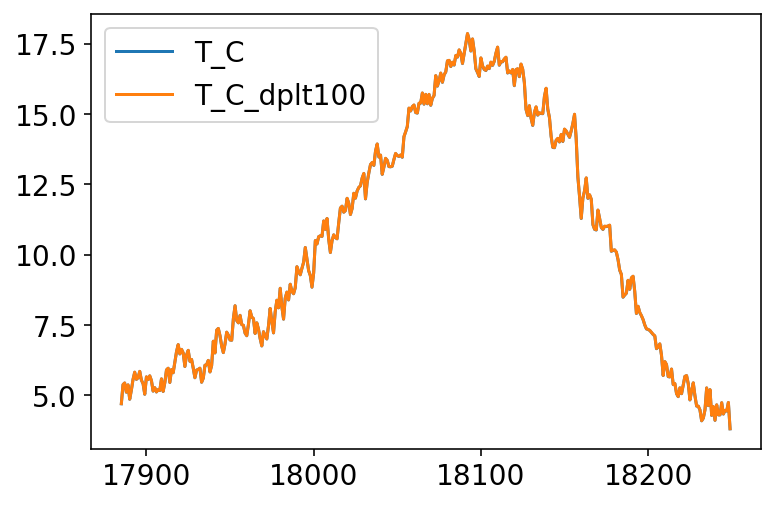

In [14]:
tdata[['T_C','T_C_dplt100']].iloc[-365:].plot()